# <center> NRE2 - Assignment 1 </center>
---
## <center> Aquifer pumping test </center>

## Preliminary notes

Before we engage in the content of the exercise, here some important first points about the assignment structure and submission.

<br>

<div class="alert alert-warning">
**Note**: This notebook is a graded assignment. You can work on this assignment alone or together in a group of two. 
<br>
<br>
If you choose to work in a group of two, then **make sure you keep the group in this form until the end of the semester**!
</div>

<div class="alert-danger">
<br>
Deadline for submission is **Wednesday, 22.11.2017, 23:59:59**
<br><br>
</div>
<br>

<div class="alert alert-warning">
<br>
Please upload your completed notebook to L²p **strictly following** the naming convention:
<ul>
<li>``assignment1_XXXXXX.ipynb`` where XXXXXX corresponds to your student ID, or:
<li>``assignment1_XXXXXX_YYYYYY.ipynb`` if you submit together (both student ID's)
</ul>
</div>

Fill in your name (and of your fellow student, if you submit together), and corresponding student ("Matrikel-") number below. If you are more than one student, separate by a comma **,**

In [1]:
NAME = "Lihuang Tang, Jiahui Kang"
MATNUM = "374832, 374500"

Before you submit this assignment, make sure everything runs as you expect it to do. This is important, because you may change variable the execution of the cells and this may lead to 
* **restart the kernel** (in the menubar, select Kernel -> Restart)
* **run all cells** (in the menubar, select Cell -> Run All)

Make sure to fill in any place that says:
```python
# YOUR CODE HERE
```
or

    YOUR ANSWER HERE


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

## Introduction

In this first assignment, you will use several of the Python functions
that were presented in the exercise notebooks to evaluate a very common
reservoir engineering application: the drawdown of pressure in an
aquifer as a result of fluid extraction (pumping) at a well. If you
followed the exercise notebooks up to now, then the tasks in this
assignment should pose no big problems to you.


Pumping tests are hydraulic tests that are frequently used to estimate hydraulic parameters in a fluid-controlled system. In this exercise, we will evaluate the distribution of drawdown (as a measure of pressure decrease) in a groundwater aquifer due to a pumping test.

### Theory: pumping in a confined aquifer

We did not discuss fluid extraction in wells in the lecture yet, so
here is a short overview (for the benefit of those who haven't yet
taken a class in hydrogeology). The extraction of fluids from a
system, for example pumping of water from an aquifer, is one of the
oldest engineering applications in the context of reservoir
engineering. Before we will look at numerical simulations methods to
solve these types of applications, we will first examine an analytical
solution: *the Theis equation*.

The Theis equation is the solution to a simplified system of transient
drawdown in an infinite and homogeneous confined aquifer of constant
thickness with an isotropic hydraulic conductivity. For a quick
clarification of these terms: 

- *confined* means that the aquifer is bounded by impermeable layers at top and bottom and completely filled with fluid (single phase flow),
- *homogeneous* means that hydraulic conductivity is equal everywhere in space and 
- *isotropic* that it is equal in each direction. 

As we consider the transient drawdown, we actually determine how the pressure changes over time.


Further, we consider a well that is fully penetrating the aquifer and
that we pump with constant rate. To
first order, we can then assume that flow is essentially only
occurring in the horizontal direction (see
figure below). Furthermore, we assume that
water is incompressible. We then can apply the concept of (piezometric)
hydraulic heads (http://en.wikipedia.org/wiki/Hydraulic_head) as
a measure of pressure in the system. 

As hydraulic conductivity $K$ does not change with depth and we consider
an incompressible fluid, we can use a vertically integrated measure of
hydraulic conductivity, the transmissivity 

$$ T = K d$$

(http://en.wikipedia.org/wiki/Hydraulic_conductivity#Transmissivity). With
all these assumptions, we derive a partial differential equation that
relates drawdown $s$ at a distance $r$ and a time $t$ with aquifer
transmissivity $T$ and storativity $S$ (e.g. Loaiciga, 2010):

$$  \frac{\partial^2 s(r,t)}{\partial r^2} + \frac{1}{r} \frac{\partial
    s(r,t)}{\partial r} = \frac{S}{T} \frac{\partial s(r,t)}{\partial t}$$

Theis (1935) obtained an analytical solution to this equation based on
analogies to solutions of heat transport problems. This classical
solution, based on all these assumptions, is now known as the Theis
equation:

$$ s(r,t) = \frac{Q}{4 \pi T} W(u)$$

with

$$ u = \frac{r^2 S}{4 T t}\;\mbox{.}$$

The function $W(u)$ in this equation is often called the ``well
function'' in the hydrogeological literature (however, it is closely
related to the *exponential integral* $W(u) = -Ei(-u)$). For the purpose of our
exercise here, it can be approximated with the first terms of its
series:

$$ W(u) \approx -0.5772 - \ln(u) + u - \frac{u^2}{2 \cdot 2!} +
  \frac{u^3}{3 \cdot 3!} - \frac{u^4}{4 \cdot 4!}$$

The functions are only valid for values of $t > 0$ and $r \ne 0$
(can you see why this is the case?), and we need to make sure that we consider this limitation when
we define ranges for $r$ below.

With the equation above, we calculate the drawdown in
meters that is directly comparable to the hydraulic head (also in
meters) as a measure of pressure change. We can therefore subtract
the value of drawdown at a given location from an initial hydraulic
head $h_0$ to determine the hydraulic head due to pumping:

$$h = h_0 - s$$


We now have all the relevant ingredients to determine the effect of
extracting water in a pumping well in an aquifer.

### Exercise overview and model setup


The aim of our exercise is to obtain a 2-D plot for the spatial
distribution of the hydraulic head resulting from pumping at a well
after a specified time. The exercise is broken down into several
smaller parts. First, you will define a Python function to calculate
drawdown as a function of distance to the well and pumping time,
basically the numerical version of the drawdown equation given above. Then, you
will use this function to create a plot of drawdown as a function of
distance to the well for a specified time. Next, the analysis will be
extended to an analysis of drawdown in the (x,y) plane, with a contour
plot and a perspective 3-D view of the ``cone of depression'' that is
obtained as a result of the fluid extraction.

If you get through these exercises with ease and want to learn a
little bit more (and collect some bonus points): in the last exercise,
we will make use of the principle of superposition to observe the
interaction between a pumping and an injection well - actually quite a
relevant example for many real-life considerations.

The model parameters and variables that we will use in this assignment
are summarised in the table below. Note: if you want to
assign a numeric value with scientific notation to a Python variable
(e.g. $10^{-e}$ for the pumping rate), you can use the exponential
notation: 

`Q = 1E-3`

| Parameter | meaning | value | unit |
|-----------|---------|-------|------|
| Q:        | pumping rate | $10^{-3}$ | [m$^{3}$/s]|
| T: | transmissivity | $10^{-2}$ |[m$^{2}$/s]|
| S: | storativity | $10^{-1}$ |[-]|
| h$_{0}$:  | initial head | 100 | [m]|


<div class="alert alert-warning">
Note: in this (simple) case, the water level in the aquifer itself is not changed - only the "hydraulic head" (as a measure of the water pressure) is affected! We will come back to this point in the lecture at a later stage.
</div>


## Task 1 (5 pts): Aquifer pumping test 

The first step is to write a Python function called
`drawdown` that calculates the drawdown of the hydraulic
head as a function of time and distance. The
function should take values for distance $r$ and time $t$ as input.

We talked about the possibility to use a vectorised programming style
with the `array`-objects of the library
`numpy`. You should make use of this possibility to pass
an array for variable $r$ as input to directly calculate multiple
drawdown values (Note: you really only need very minimal adjustment to
get this done!).<br><br>

<div class="alert alert-danger">
**Important note**: The function name and header (with the order of passed arguments), as well as the return type are already given. Please **keep this structure**, otherwise the testing may fail and you will get no points.
</div>

<div class="alert alert-info">
**Your task (5 pts)**: Write a function to calculate head drawdown. This function should calculate the drawdown of the hydraulic head according to the Theis equation. The function should work properly if a scalar value or a `numpy`-array is passed as argument $r$.
</div>



In [3]:
# Set variable values here:
# Your code here (remove the following line and replace with solution): 
Q = 1E-3
T = 1E-2
S = 1E-1
h0 = 100

# End your code

In [4]:
# complete the code in the function to calculate drawdown
def drawdown(t, r, T, S, Q):
    """Calculate drawdown due to pumping at distance r for time t
    
    **Arguments**:
        t: Time after onset, float
        r: Radial distance to well, float or array
        T: Transmissivity, float
        S: Storage coefficient, float
        Q: Pumping rate, float
        
    **Returns**:
        s: Drawdown, float
    """
    
    # Your code here (remove the following line and replace with solution): 
    u = (r**2*S)/(4*T*t)
    W = -0.5772 - np.log(u) + u - u**2/(2*np.math.factorial(2)) + u**3/(3*np.math.factorial(3)) - u**4/(4*np.math.factorial(4))
    s = Q/(4*np.pi*T)*W
    
    
    # End your code
    return s


<div class="alert alert-success">
**Test**: Here some test values to check if your function works: 
<ul>
<li>For **$t = $10 hours**, and **$r = $10 m**, the function should return approx. **0.035010**</li>
<li>For **$t = $365 days**, and **$r = $100 m**, the function should return approx. **0.052231**</li>
</ul>
Also check that the function works if you pass a numpy array object!
</div>

In [5]:
# test your function here:
t = 10 * 3600.
r = 10.
print(drawdown(t, r, T, S, Q))
t = 24. * 3600. * 365
r = 100.
print(drawdown(t, r, T, S, Q))

0.0350104723256
0.0522314834861


In [6]:
# Autograding cell, please do not touch

In [7]:
# Autograding cell, please do not touch

## Task 2 (5 pts): Create a plot of drawdown vs. distance

Use the function you created for calculating drawdown $s$ for a range of $r \in [1,100]$ m with increments of 0.1 m. *(Ideally using numpy)*  

<div class="alert alert-info">
**Your task (5 pts)**: Create a plot of drawdown for these $r$-values at a time $t$ = 10 hours, using the ```matplotlib.pyplot``` command ```plot```.
</div>
<div class="alert alert-warning">
Note: Don't forget to **add title and correct axes labels** to get **full points**.
</div>

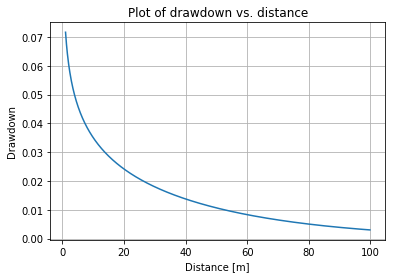

In [8]:
# Your code here (remove the following line and replace with solution): 
r=np.arange(1,100,0.1)
t=10*60*60
s=drawdown(t, r, T, S, Q)

plt.plot(r,s)
plt.xlabel('Distance [m]')
plt.ylabel('Drawdown')
plt.title('Plot of drawdown vs. distance')
plt.grid(True)
#plt.savefig('drawdown-distance.png')

# End your code

## Task 3 (10 pts): Determine the hydraulic head in an (x,y)-plane

Use the function ```contourf``` for creating a plot of filled contours for the calculated heads.  
*(Hint: Use numpy methods for an efficient implementation)*  

Remember using the distance field you calculated in the previous exercise notebook (`Ex_plotting`). This can directly be used to calculate the drawdown for the entire field.  
Once you determined the drawdown at each location, calculate the resulting hydraulic head (with an initial head value of h$_0$ = 100 m).

Don't forget to add title, axes labels, and a colorbar to get full points!

<div class="alert alert-info">
**First Step (3 pts):**
Write a function to calculate the distance field ranging from -99.5 m to 99.5 m in 1 m increments in both directions (avoid the position (0,0) - I guess it is quite obvious why. If not, test it with your function above). Use the results of that function to calculate the resulting hydraulic head for a time $t$ = 10 hours.
</div>

In [9]:
def distance_field(a, b, incr):
    """Get a grid of a, b dimensions with incr - discretization.
    
    **Arguments**:
        a = list / array, containing [a_min a_max]
        b = list / array, containing [b_min b_max]
        incr = float, size of increment
    
    **Returns**:
        X,Y = gridded mesh
    """
    
    # Your code here (remove the following line and replace with solution): 
    x  = np.arange(a[0],a[1],incr)
    y  = np.arange(b[0],b[1],incr)
    
    (X, Y) = np.meshgrid(x, y)    
    
    # End your code
    return X,Y

In [10]:
# Autograding cell, please do not touch

In [11]:
# Autograding cell, please do not touch

<div class="alert alert-info">
**Second Step (6 pts):**
Create a 2D contour plot of the hydraulic head (*not* drawdown!).  
Add a colorbar, add a plot title, and label axes correctly to get all points.
</div>

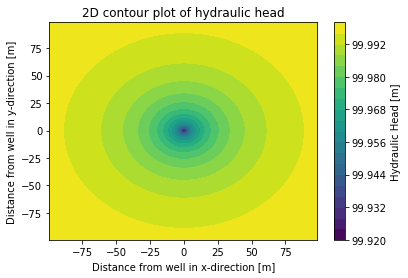

In [12]:
# Your code here (remove the following line and replace with solution): 
[X,Y] = distance_field([-99.5,99.5],[-99.5,99.5],1)

r = np.sqrt(X**2 + Y**2)
t = 10*60*60

h = np.ones_like(r)*h0
h = h - drawdown(t,r,T,S,Q)

n=20
plt.contourf(X, Y, h, n)
cbar = plt.colorbar()
cbar.set_label('Hydraulic Head [m]')
plt.xlabel('Distance from well in x-direction [m]')
plt.ylabel('Distance from well in y-direction [m]')
plt.title('2D contour plot of hydraulic head')

# End your code

<div class="alert alert-info">
**Third Step (1 pt):**
Create a perspective plot of the hydraulic head.
</div>

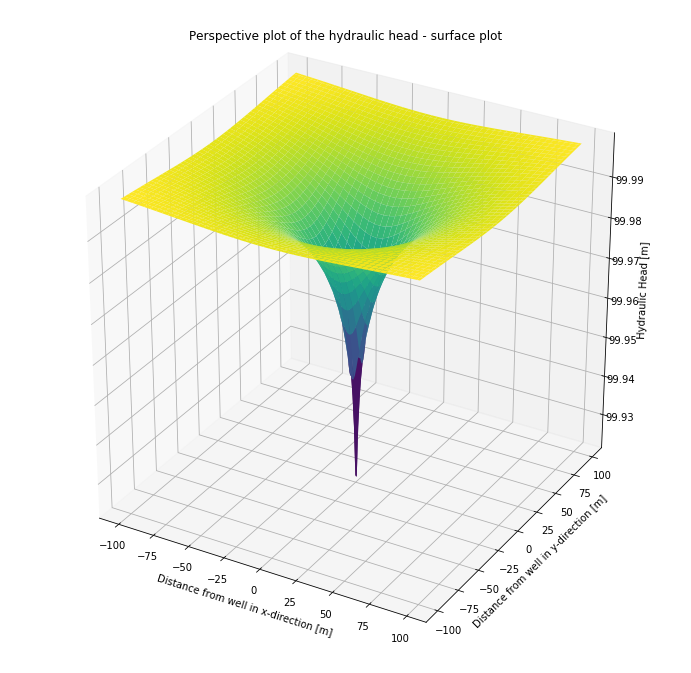

In [13]:
# Your code here (remove the following line and replace with solution): 
from mpl_toolkits.mplot3d import Axes3D
rcParams['axes.titlepad'] = 23

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, h, cmap='viridis') # my new favourite colormap
ax.set_xlabel('Distance from well in x-direction [m]')
ax.set_ylabel('Distance from well in y-direction [m]')
ax.set_zlabel('Hydraulic Head [m]')
ax.set_title('Perspective plot of the hydraulic head - surface plot')
# End your code

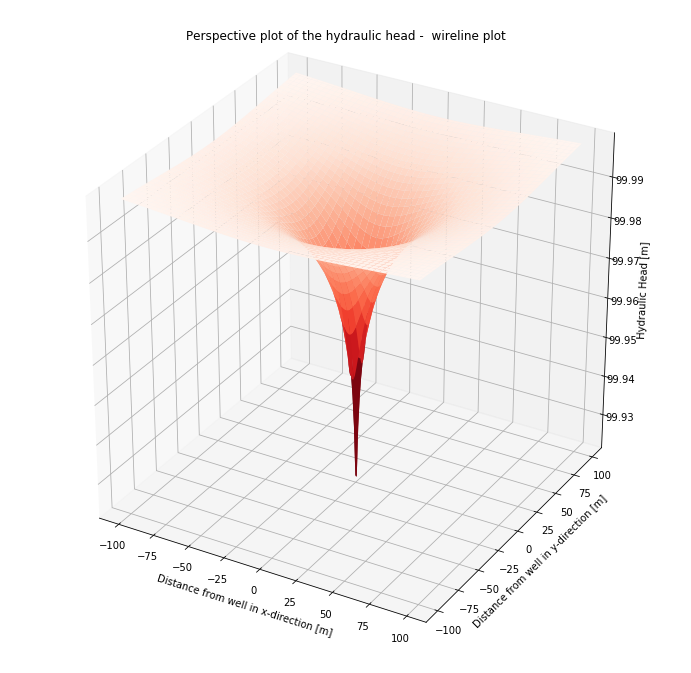

In [14]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, h, cmap='Reds_r') # my favourite colormap
ax.set_xlabel('Distance from well in x-direction [m]')
ax.set_ylabel('Distance from well in y-direction [m]')
ax.set_zlabel('Hydraulic Head [m]')
ax.set_title('Perspective plot of the hydraulic head -  wireline plot')

## Bonus Task (5 pts): Analyse combined effect of two pumping wells

In this bonus exercise, you'll assess the effect of two neighbouring wells.  
Using the *principle of superposition*, you can calculate the resulting effect of simultaneous pumping in several wells.  

<div class="alert alert-warning">
The *principle of superposition* states that the sum of two (or more) solutions of a linear system (with different boundary conditions) is also a solution.  
</div>

Ideally, include now the distance between two wells as an additional variable, $d$, to be able to test different well-distances (e.g. 10 m, 50 m, 100 m).  

#### First step: 
In our case, you can simply add the effect of both wells to obtain the overall drawdown in the system. That means, that you have to create two distance fields (one for each well).  

The investigated area is now rectengular with an extent of ca. 300 x 200 m (x $\in$ [-149.5, 149.5]; y $\in$  [-99.5 99.5], with 1 m increments). You should be able to re-use the distance function you created before. 

#### Second step: 
Calculate the drawdown fields for each well (on the basis of each distance field) and calculate the combined effect.

#### Third step: 
Create a contour-plot (```contourf```) or a perspective plot to visualise the effect of two pumping wells. Plot the resulting hydraulic head field (not drawdown!) for a well distance of **50 m**.
Again, don't forget axes labels, title, and a colorbar. 

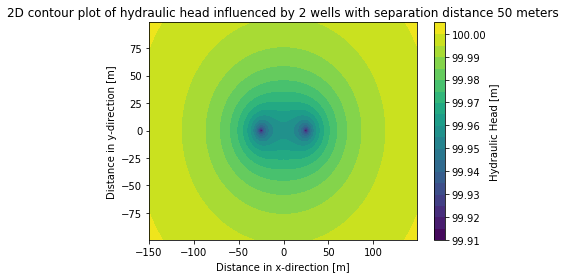

In [15]:
# Your code here (remove the following line and replace with solution): 
rcParams['axes.titlepad'] = 6

d = 50
t = 10*60*60

# Step 1
[X,Y] = distance_field([-149.5,149.5],[-99.5,99.5],1)
r1 = np.sqrt((X-(d/2))**2 + Y**2)
r2 = np.sqrt((X+(d/2))**2 + Y**2)

# Step 2
h = np.ones_like(r1)*h0
h = h - drawdown(t,r1,T,S,Q) - drawdown(t,r2,T,S,Q)

# Step 3
n=20
plt.contourf(X, Y, h, n)
cbar = plt.colorbar()
cbar.set_label('Hydraulic Head [m]')
plt.xlabel('Distance in x-direction [m]')
plt.ylabel('Distance in y-direction [m]')
plt.title('2D contour plot of hydraulic head influenced by 2 wells with separation distance %d meters'%d)
# End your code

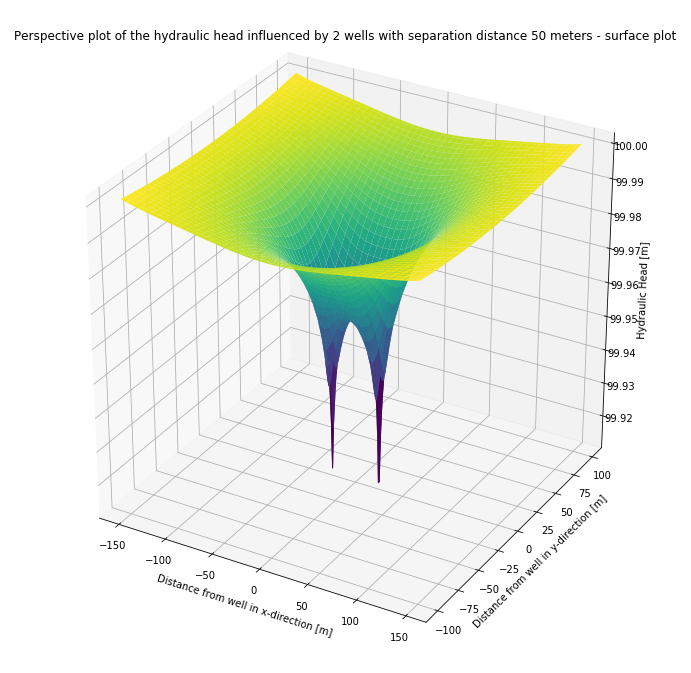

In [16]:
rcParams['axes.titlepad'] = 23 

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, h, cmap='viridis') # my new favourite colormap
ax.set_xlabel('Distance from well in x-direction [m]')
ax.set_ylabel('Distance from well in y-direction [m]')
ax.set_zlabel('Hydraulic Head [m]')
ax.set_title('Perspective plot of the hydraulic head influenced by 2 wells with separation distance %d meters - surface plot'%d)

## Summary

In this notebook, you wrote functions in Python to calculate a simple reservoir engineering problem with an analytical function and used appropriate methods to present results in the form of plots. These are important basic ingredients of any computational scientific investigation and we will make more use of these methods in the future! If you managed to get through this notebook, then you are well-prepared for the remaining exercise content!
<br><br>

<div class="alert-success"><br>
Some additional remarks:<br>
**Remark 1**: did you experiment with the parameters a bit? For some combinations, the solution becomes nonsensical! What are these combinations and what is the reason of the problem? Can you fix it?<br>
**Remark 2**: If you did the bonus question: did you invesigate what happens if you have an extraction and an injection well?<br><br>
</div>

And finally, again a reminder:
<div class="alert-warning">

Upload your completed notebook to L²p **strictly following** the naming convention:
<ul>
<li>``assignment1_XXXXXX.ipynb`` where XXXXXX corresponds to your student ID, or:
<li>``assignment1_XXXXXX_YYYYYY.ipynb`` if you submit together (both student ID's)
</ul>

Otherwise, the grading process may fail and **you could end up with zero points**!

</div>


## References

[1] Hugo A Loaiciga. Derivation Approaches for the Theis (1935) Equation. Ground Water, 48(1):2–5, 2010.

[2] Charles V Theis. The relation between the lowering of the Piezometric surface and the rate and duration of discharge of a well using ground-water storage. Transactions, American Geophysical Union, 16(2):519, 1935.